In [4]:
import matplotlib.pyplot as plt

# **ЛР 1.2**

In [ ]:
ages = []
with open('moscow_2021.txt', 'r') as f:
    for l in f.readlines():
        ages.append(int(l.strip()))

### _Функции характеристик_

In [ ]:
def init_moment_k(nums: list, k: int = 1) -> float:
    sum_k=0
    for n in nums:
        sum_k+=n**k
    return sum_k/len(nums)

def cent_moment_k(nums: list, k: int) -> float:
    dif_sum_k = 0
    mean_num = init_moment_k(nums)
    for n in nums:
        dif_sum_k+=(n-mean_num)**k
    return dif_sum_k/len(nums)


def assymetry(nums: list) -> float:
    nu3 = cent_moment_k(nums, 3)
    deviation = cent_moment_k(nums, 2)**0.5
    return nu3/deviation**3

def excess(nums: list) -> float:
    nu4 = cent_moment_k(nums, 4)
    deviation = cent_moment_k(nums, 2)**0.5
    return nu4/deviation**4 - 3

### _Функции проверки соответствия норм распределению_

In [7]:
def count_in_sigmak(nums: list, k: int)-> int:
    mean_nums = init_moment_k(nums)
    deviation = cent_moment_k(nums, 2)**0.5
    count_sigmak = 0
    for n in nums:
        if mean_nums-k*deviation < n < mean_nums+k*deviation:
            count_sigmak += 1 
    return count_sigmak

def check_sigmarule(nums: list) -> bool:
    count_sigma1 = count_in_sigmak(nums, 1)
    count_sigma2 = count_in_sigmak(nums, 2)
    count_sigma3 = count_in_sigmak(nums, 3)
    
    total_amount = len(nums)
    percent1 = count_sigma1/total_amount*100
    percent2 = count_sigma2/total_amount*100
    percent3 = count_sigma3/total_amount*100

    print(f'Sigma1 {percent1:.3f}%')
    print(f'Sigma2 {percent2:.3f}%')
    print(f'Sigma3 {percent3:.3f}%')
    eps = 0.2
    return abs(68.3-percent1)<=eps and abs(95.4-percent2)<=eps and abs(99.7-percent3)<=eps

In [8]:
print(f'Assymetry = {assymetry(ages):.3f}')
print(f'Excess = {excess(ages):.3f}')
print(f'Подчиняется правилу 3х сигм: {check_sigmarule(ages)}')

Assymetry = 0.623
Excess = -0.060
Sigma1 66.351%
Sigma2 94.670%
Sigma3 99.948%
Подчиняется правилу 3х сигм: False


In [9]:
print(f'Assymetry = {assymetry(ages):.3f}')
print(f'Excess = {excess(ages):.3f}')
print(f'Подчиняется правилу 3х сигм: {check_sigmarule(ages)}')

Assymetry = 0.623
Excess = -0.060
Sigma1 66.351%
Sigma2 94.670%
Sigma3 99.948%
Подчиняется правилу 3х сигм: False


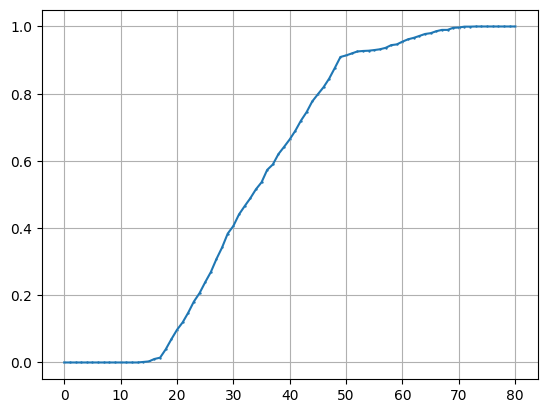

In [10]:
distribution = [0.]*81
total = 0

pointer_ages = 0
nice_ages = sorted(ages)
N = len(nice_ages)
for a in range(len(distribution)):
    while pointer_ages<N and nice_ages[pointer_ages]<=a:
        pointer_ages+=1
        total+=1
    distribution[a]=total/N

# не совсем функция расределения
plt.plot(list(range(81)), distribution)
plt.scatter(list(range(81)), distribution, s=0.5)
plt.grid()